In [1]:
import pandas as pd
import glob

path = "Neural Network/Dados/"
all_files = glob.glob(path + "*.binetflow")

dataframes = []

# Loop para ler cada arquivo e adicionar o dataframe à lista
for filename in all_files:
    df = pd.read_csv(filename)
    df['Label'] = df.Label.str.contains("Botnet")
    dataframes.append(df)

# Concatena todos os dataframes em um único dataframe
data = pd.concat(dataframes, ignore_index=True)

In [2]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [3]:
import LoadData
import DataPreparation
import pickle
file = open('flowdata.pickle', 'rb')
data  = pickle.load(file, encoding='latin1')

In [4]:
Xdata = data[0]
Ydata =  data[1]
XdataT = data[2]
YdataT = data[3]

In [5]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

In [6]:
DataPreparation.Prepare(Xdata,Ydata,XdataT,YdataT)

<Prepare(Thread-6, initial)>

Modelo de árvore de decisão:

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)

start_time = time.time()
clf.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

processing_time = end_time - start_time

y_pred = clf.predict(X_test)

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas
print("Acuracia:", accuracy)
print("Precisao:", precision)
print("Sensitividade:", recall)
print("F1-Score:", f1)
print("Tempo de processamento:", round(processing_time, 2), "segundos")

# Armazenando as métricas nas variáveis
ad_acuracia = round(accuracy * 100, 2)
ad_precisao = round(precision * 100, 2)
ad_sensitividade = round(recall * 100, 2)
ad_f1score = round(f1 * 100, 2)
ad_time = round(processing_time, 2)

Acuracia: 0.9996250468691413
Precisao: 0.9992563212692117
Sensitividade: 1.0
F1-Score: 0.999628022318661
Tempo de processamento: 5.56 segundos


Modelo de regressão logística :

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import time

scaler = StandardScaler()
Xdata = scaler.fit_transform(Xdata)
XdataT = scaler.transform(XdataT)

selector = SelectKBest(f_classif, k='all')
Xdata = selector.fit_transform(Xdata, Ydata)
XdataT = selector.transform(XdataT)

pipeline = Pipeline([
    ('clf', LogisticRegression())
])

parameters = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

clf = GridSearchCV(pipeline, parameters, cv=5)

start_time = time.time()
clf.fit(Xdata, Ydata)
end_time = time.time()

processing_time = end_time - start_time

# Calculando as métricas
Score = clf.score(XdataT, YdataT)
Prediction = clf.predict(XdataT)
precision = precision_score(YdataT, Prediction)
recall = recall_score(YdataT, Prediction)
f1 = f1_score(YdataT, Prediction)

# Imprimindo as métricas
print("Acuracia:", Score)
print("Precisao:", precision)
print("Sensitividade:", recall)
print("F1-score:", f1)
print("Tempo de processamento:", round(processing_time, 2), "segundos")

# Armazenando as métricas nas variáveis
rl_acuracia = round(Score * 100, 2)
rl_precisao = round(precision * 100, 2)
rl_sensitividade = round(recall * 100, 2)
rl_f1score = round(f1 * 100, 2)
rl_time = round(processing_time, 2)

Acuracia: 0.9683063387322536
Precisao: 0.941387108933283
Sensitividade: 0.9988002399520096
F1-score: 0.9692442029688562
Tempo de processamento: 4.91 segundos


Modelo Gaussiano Naive Bayes :

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

# Pré-processamento de dados
scaler = StandardScaler()
Xdata = scaler.fit_transform(Xdata)
XdataT = scaler.transform(XdataT)

# Seleção de recursos
selector = SelectKBest(f_classif, k='all')
Xdata = selector.fit_transform(Xdata, Ydata)
XdataT = selector.transform(XdataT)

# Ajuste de hiperparâmetros
pipeline = Pipeline([
    ('clf', GaussianNB())
])

parameters = {
    'clf__var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

clf = GridSearchCV(pipeline, parameters, cv=5)

# Medindo o tempo de processamento do treinamento do modelo
start_time = time.time()
clf.fit(Xdata, Ydata)
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# Avaliação do modelo
Prediction = clf.predict(XdataT)
Score = clf.score(XdataT, YdataT)
precision = precision_score(YdataT, Prediction)
recall = recall_score(YdataT, Prediction)
f1 = f1_score(YdataT, Prediction)

#métricas
print("Acuracia:", Score)
print("Precisao:", precision)
print("Sensitividade:", recall)
print("F1-score:", f1)
print("Tempo de processamento:", round(processing_time, 2), "segundos")

nb_acuracia = round(Score * 100, 2)
nb_precisao = round(precision * 100, 2)
nb_sensitividade = round(recall * 100, 2)
nb_f1score = round(f1 * 100, 2)
nb_time = round(processing_time, 2)

Acuracia: 0.9819036192761448
Precisao: 0.9663312693498453
Sensitividade: 0.9986002799440112
F1-score: 0.982200806372308
Tempo de processamento: 0.8 segundos


Modelo de k-vizinhos mais próximos :

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Criando o classificador
clf = KNeighborsClassifier()

# Treinando o modelo
start_time = time.time()
clf.fit(Xdata, Ydata)
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# Fazendo previsões
Prediction = clf.predict(XdataT)

# Calculando as métricas
accuracy = accuracy_score(YdataT, Prediction)
precision = precision_score(YdataT, Prediction)
recall = recall_score(YdataT, Prediction)
f1 = f1_score(YdataT, Prediction)

# Imprimindo as métricas
print("Acuracia:", accuracy)
print("Precisao:", precision)
print("Sensibilidade:", recall)
print("F1-score:", f1)
print("Tempo de processamento:", round(processing_time, 2), "segundos")

knn_acuracia =  round(accuracy * 100, 2)
knn_precisao = round(precision * 100, 2)
knn_sensitividade = round(recall * 100, 2)
knn_f1score = round(f1 * 100, 2)
knn_time = round(processing_time, 2)

Acuracia: 0.9908018396320736
Precisao: 0.9832644221303406
Sensibilidade: 0.9986002799440112
F1-score: 0.9908730158730158
Tempo de processamento: 0.27 segundos


Modelo de rede neural :

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# normaliza os dados
scaler = StandardScaler()
Xdata_norm = scaler.fit_transform(Xdata)
XdataT_norm = scaler.transform(XdataT)

# reduz a dimensionalidade dos dados
pca = PCA(n_components=5)
Xdata_pca = pca.fit_transform(Xdata_norm)
XdataT_pca = pca.transform(XdataT_norm)

# define a arquitetura da rede neural
model = Sequential()
model.add(Dense(512, input_dim=Xdata_pca.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid", kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

# compila a rede neural
optimizer = Adam(lr=0.0005, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# treina a rede neural
start_time = time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(Xdata_pca, Ydata, epochs=150, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# avalia a rede neural
loss, accuracy = model.evaluate(XdataT_pca, YdataT, verbose=0)
Y_pred = model.predict(XdataT_pca)
Y_pred_class = (Y_pred > 0.5).astype(int)
precision = precision_score(YdataT, Y_pred_class)
recall = recall_score(YdataT, Y_pred_class)
f1 = f1_score(YdataT, Y_pred_class)

#métricas
print("Acuracia:", accuracy)
print("Precisao:", precision)
print("Sensitividade:", recall)
print("F1-score:", f1)
print("Tempo de processamento:", round(processing_time, 2), "segundos")

rn_acuracia = round(accuracy * 100, 2)
rn_precisao = round(precision * 100, 2)
rn_sensitividade = round(recall * 100, 2)
rn_f1score = round(f1 * 100, 2)
rn_time = round(processing_time, 2)

Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


501/501 [==============================] - 5s 7ms/step - loss: 0.1411 - accuracy: 0.9576 - val_loss: 0.0322 - val_accuracy: 0.9950
Epoch 2/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0866 - accuracy: 0.9778 - val_loss: 0.0122 - val_accuracy: 0.9998
Epoch 3/150
501/501 [==============================] - 4s 7ms/step - loss: 0.0800 - accuracy: 0.9795 - val_loss: 0.0246 - val_accuracy: 0.9996
Epoch 4/150
501/501 [==============================] - 4s 8ms/step - loss: 0.0762 - accuracy: 0.9799 - val_loss: 0.0205 - val_accuracy: 0.9988
Epoch 5/150
501/501 [==============================] - 4s 7ms/step - loss: 0.0724 - accuracy: 0.9813 - val_loss: 0.0176 - val_accuracy: 0.9983
Epoch 6/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0681 - accuracy: 0.9816 - val_loss: 0.0227 - val_accuracy: 0.9989
Epoch 7/150
501/501 [==============================] - 4s 8ms/step - loss: 0.0675 - accuracy: 0.9813 - val_loss: 0.0194 - val_accuracy: 0.9980
Epoch 8/150

313/313 [==============================] - 1s 2ms/step
Acuracia: 0.9823035597801208
Precisao: 0.9672607516466486
Sensitividade: 0.9984003199360127
F1-score: 0.9825838827117976
Tempo de processamento: 196.17 segundos


Resultados - Acuracia

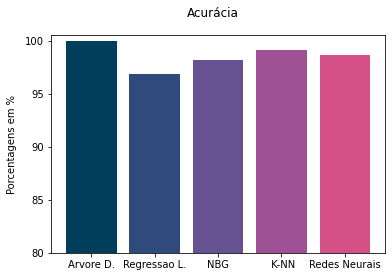

In [25]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_acuracia, rl_acuracia, nb_acuracia, knn_acuracia, rn_acuracia]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(80, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([80, 85, 90, 95, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('Acurácia')

# Exibindo o gráfico
plt.show()

Resultados - Precisão

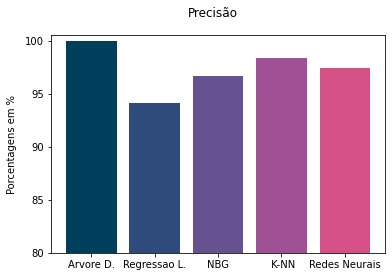

In [26]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_precisao, rl_precisao, nb_precisao, knn_precisao, rn_precisao]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(80, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([80, 85, 90, 95, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('Precisão')

# Exibindo o gráfico
plt.show()

Resultados - Sensitividade

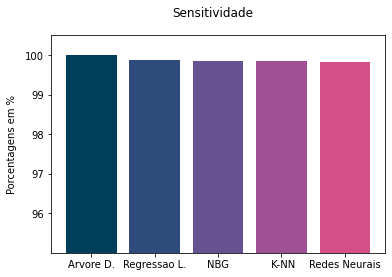

In [27]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_sensitividade, rl_sensitividade, nb_sensitividade, knn_sensitividade, rn_sensitividade]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(95, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([96, 97, 98, 99, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('Sensitividade')

# Exibindo o gráfico
plt.show()

Resultados - F1-Score

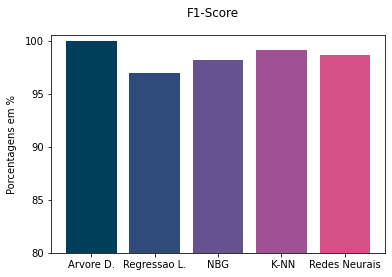

In [28]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_f1score, rl_f1score, nb_f1score, knn_f1score, rn_f1score]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(80, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([80, 85, 90, 95, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('F1-Score')

# Exibindo o gráfico
plt.show()

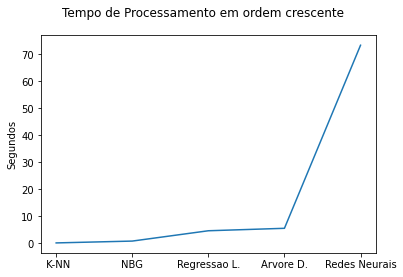

In [29]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_time, rl_time, nb_time, knn_time, rn_time]

# Criando lista de índices para o eixo x em ordem crescente
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Ordenando os dados em ordem crescente
dados, indices = zip(*sorted(zip(dados, indices)))

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando linha ao gráfico
ax.plot(indices, dados)

# Definindo rótulos aos eixos
ax.set_ylabel('Segundos')

# Adicionando título
fig.suptitle('Tempo de Processamento em ordem crescente')

# Exibindo o gráfico
plt.show()

In [13]:
!pip install graphviz

In [15]:
from sklearn.tree import export_graphviz
import graphviz 
import numpy

# Treinamento da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Exportando a árvore de decisão para um arquivo .dot
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=Xdata.columns,  
                           class_names=['0', '1'],  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Exibindo a imagem da árvore de decisão na tela
graph.render('arvore-decisao', format='png')
graph.view()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'